In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [3]:

letters = pd.read_csv("letterdata.csv")
letters
letters.head()
letters.describe()






,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


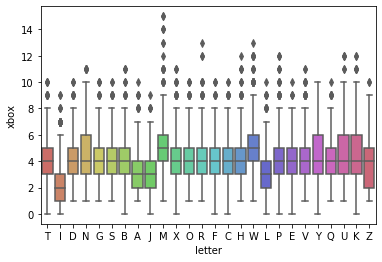

In [4]:
sns.boxplot(x="letter",y="xbox",data=letters,palette = "hls")


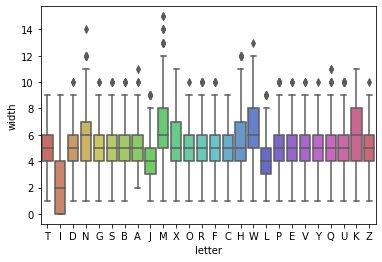

In [5]:
sns.boxplot(x="letter",y="width",data=letters,palette = "hls")

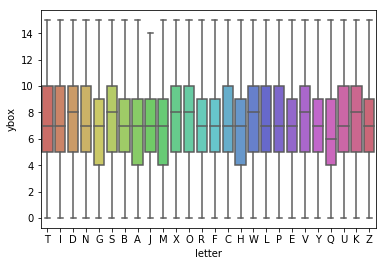

In [7]:
sns.boxplot(x="letter",y="ybox",data=letters,palette = "hls")

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
train,test = train_test_split(letters,test_size = 0.3, random_state=1)
test.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
11456,D,4,6,4,4,3,5,7,9,7,7,6,6,2,8,3,8
16528,D,2,3,2,2,2,7,7,6,6,7,6,5,2,8,2,7
3253,V,3,4,4,3,1,4,12,3,3,10,11,7,2,11,1,8
18614,B,3,7,4,5,4,6,6,8,6,6,7,7,2,9,7,9
1544,H,5,8,7,6,6,4,9,3,5,10,9,9,3,8,3,5


In [7]:
train_X = train.iloc[:,1:]
train_y = train.iloc[:,0]
test_X  = test.iloc[:,1:]
test_y  = test.iloc[:,0]

In [8]:
model_linear = SVC(kernel = "linear")
model_linear.fit(train_X,train_y)
pred_test_linear = model_linear.predict(test_X)

np.mean(pred_test_linear==test_y)


0.844

In [9]:
# Kernel = poly
model_poly = SVC(kernel = "poly")
model_poly.fit(train_X,train_y)
pred_test_poly = model_poly.predict(test_X)
np.mean(pred_test_poly==test_y) # Accuracy = 94.499

0.9436666666666667

In [10]:

# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(train_X,train_y)
pred_test_rbf = model_rbf.predict(test_X)

np.mean(pred_test_rbf==test_y)# Accuracy = 97.016


0.9168333333333333

In [15]:
test_y.shape

(6000,)